# Day 2 - Text Detection ##
### Objetive: Exercise on Stroke Width Transform & Maximally Stable Extremal Regions ###
### Dataset: Handwritten Arabic Image  ###
### Please fill in all sections that start with "# Task" , sections that start with "# Step" are  pre-implemented #######

#### Section 1 - Dependencies & Libraries

In [ ]:
# Step 1.1. - Install required libraries
!pip3 install numpy swtloc matplotlib deskew opencv-python opencv-contrib-python

# Step 1.2. - Restart Kernel Manually
# Toolbar -> Kernel -> Restart & Clear Output -> Restart & Clear All Outputs

In [1]:
# Step 1.3. - Import required libraries
import cv2, numpy as np, easyocr, pandas as pd, os, matplotlib.pyplot as plt, swtloc as swt
from deskew import determine_skew
from skimage.transform import rotate

#### Section 2 - Read Image, define Function to Show Image Inline and Pre-process Image
#### For More Information on Preprocessing - See Day 1 Exercise

In [2]:
# Step 2.1. Read handwritten_arabic.jpg using OpenCV
img = cv2.imread('handwritten_arabic.jpg')

# Step 2.2. Define function to show opencv image inline using matplotlib
def show_image(image, color=None):
    imgplot = plt.imshow(image, cmap=color)
    plt.show()

# Step 2.3. Apply Greyscaling using cv2.cvtColor
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2.4. Apply Binary Thresholding using cv2.adaptiveThreshold
binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)

# Step 2.5. Apply Noise Removal 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
denoised_image = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

# Step 2.6. Perform Dilation
kernel = np.ones((1,1), np.uint8)
dilated_image = cv2.dilate(denoised_image, kernel, iterations=1)

# Step 2.7. Fix Rotation - Deskewing Image (both the original and the pre-processed one)
rotated_image = (rotate(dilated_image, determine_skew(dilated_image), resize=True)*255).astype(np.uint8)
rotated_raw_image = (rotate(img, determine_skew(img), resize=True)*255).astype(np.uint8)

#### Section 3 - Implement Stroke Width Transform and Highlight Area of Image with Text

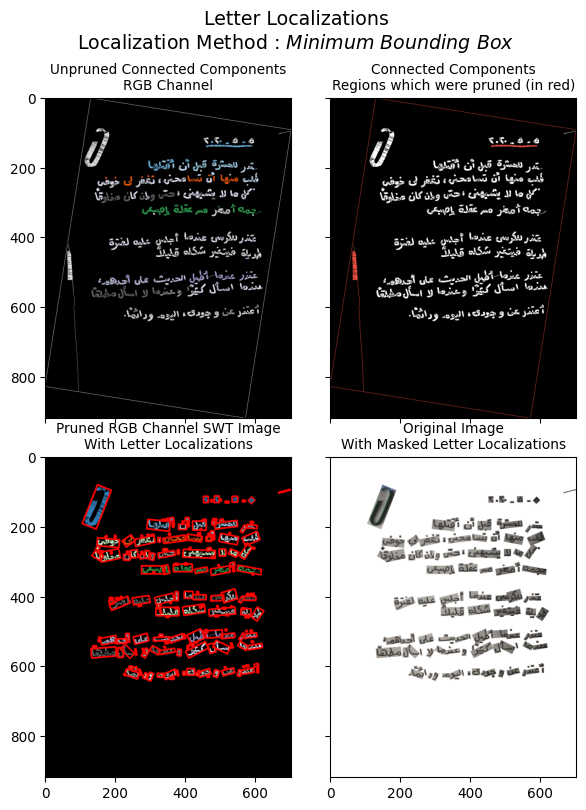

In [3]:
# Task 3.1. - Instantiate SWTLocalizer from swtloc library; specifying rotated_raw_image as the input to 'images' parameters
# SWT Library automatically performs Grayscaling, Binary Thresholding and Erosion/Dilation.
swtl = swt.SWTLocalizer(images=rotated_raw_image)

# Task 3.2. - Select the First Image of the output from Task 3.1.
swtImgObj = swtl.swtimages[0]

# Task 3.3. - Perform TransformImage and Experiment with Different Parameters
swt_mat = swtImgObj.transformImage(text_mode='lb_df',
                                   maximum_angle_deviation=np.pi/4,
                                   #gaussian_blurr_kernel=(11, 11), best results with no blur
                                   minimum_stroke_width=1,
                                   maximum_stroke_width=100,
                                   display=False)

# Task 3.4. - Perform Letter Localization - Displaying the Results
localized_letters = swtImgObj.localizeLetters(minimum_pixels_per_cc=5, maximum_pixels_per_cc=10000)

#### Section 4- Maximally Stable Extremal Regions (MSER)

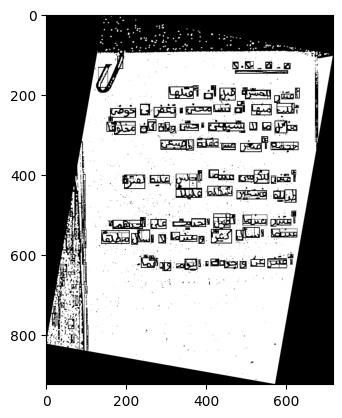

In [4]:
# Task 4.1 - Initializing the cv2 MSER_create class; Experimenting with different parameters (min_area, max_area)
mser = cv2.MSER_create(min_area=50, max_area=3000)

# Task 4.2 - Detect regions on the pre-processed image (rotated_image).
regions, _ = mser.detectRegions(rotated_image)

# Task 4.3 - Draw regions on the image.
for p in regions:
    xmax, ymax = np.amax(p, axis=0)
    xmin, ymin = np.amin(p, axis=0)
    cv2.rectangle(rotated_image, (xmin,ymax), (xmax,ymin), (0, 255, 0), 1)

# Task 4.4 - Show the Image with the Rectangles
show_image(rotated_image, color='gray')